In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [8]:
dfx = pd.read_csv("./Downloads/Logistic_X_Train.csv")
dfy = pd.read_csv("./Downloads/Logistic_Y_Train.csv")
d = dfx.join(dfy)
d

,f1,f2,f3,label
0,-1.239375,0.749101,-0.528515,1
1,-1.036070,0.801436,-1.283712,1
2,-0.615579,1.579521,-1.391927,1
3,1.335978,1.348651,1.433564,0
4,0.658925,1.300019,0.571603,0
...,...,...,...,...
2995,-0.455628,1.302303,-1.338027,1
2996,-0.434551,1.597813,-1.748643,1
2997,0.088277,1.638789,-2.193641,1
2998,1.525155,0.859234,1.505308,0


In [18]:
dfx_val = dfx.values.T
print(dfx_val)
print(dfx_val.shape)

[[-1.23937466 -1.03607028 -0.61557914 ...  0.08827657  1.52515501
  -0.97981744]
 [ 0.74910149  0.80143631  1.57952053 ...  1.63878904  0.85923429
   0.56395376]
 [-0.52851491 -1.28371152 -1.39192706 ... -2.19364056  1.50530791
  -1.53939416]]
(3, 3000)


In [34]:
x1 = dfx_val[0]
x2 = dfx_val[1]
x3 = dfx_val[2]
Y = dfy.values
Y.shape

(3000, 1)

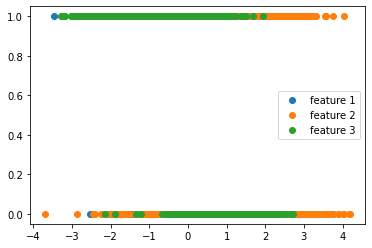

In [35]:
plt.scatter(x1,Y,label ="feature 1")
plt.scatter(x2,Y,label ="feature 2")
plt.scatter(x3,Y,label ="feature 3")
plt.legend()
plt.show()

In [28]:
X_matrix = np.array([x1,x2,x3])
X_matrix.shape

(3, 3000)

# hypothesis function 

In [39]:
def hypothesis(X_matrix,Weight_matrix,bias):
    hx = (np.dot(Weight_matrix,X_matrix).T) + bias
    return sigmoid(hx) 

# sigmoid function 

In [40]:
def sigmoid(hx):
    return 1.0/(1 + np.exp(-1.0*hx))


# logarithic error function

In [55]:
def error(X_matrix,Weight_matrix,bias,Y):
    err = 0.0
    hx = hypothesis(X_matrix,Weight_matrix,bias)
    for i in range(X_matrix.shape[1]):
        err += Y[i][0]*np.log2(hx[i][0]) + (1 - Y[i][0])*np.log2(1-hx[i][0])
    return err/X_matrix.shape[1] # mean error
    

In [56]:
def gradient(X_matrix,Weight_matrix,Y,bias):
    grad_matrix = np.zeros(Weight_matrix.shape)
    grad_of_bias = 0.0
    hx = hypothesis(X_matrix,Weight_matrix,bias)
    for i in range(X_matrix.shape[1]):
        grad_matrix[0][0] += (Y[i][0] - hx[i][0])*X_matrix[0][i]
        grad_matrix[0][1] += (Y[i][0] - hx[i][0])*X_matrix[1][i]
        grad_matrix[0][2] += (Y[i][0] - hx[i][0])*X_matrix[2][i]
        grad_of_bias += (Y[i][0] - hx[i][0])
        
    return grad_matrix/X_matrix.shape[1],grad_of_bias/X_matrix.shape[1]

In [70]:
def gradient_ascent(X_matrix,Y,learning_rate = 0.01):
    Weight_matrix = 5*np.random.random((1,X_matrix.shape[0]))
    bias = 5*np.random.random(1)[0]
    err_lst =[];
    
    grad, Bias = gradient(X_matrix,Weight_matrix,Y,bias)
    
    for i in range(1000):
        
        e = error(X_matrix,Weight_matrix,bias,Y)
        err_lst.append(e)
    
        Weight_matrix[0][0] += learning_rate*grad[0][0] 
        Weight_matrix[0][1] += learning_rate*grad[0][1] 
        Weight_matrix[0][2] += learning_rate*grad[0][2] 
        bias += learning_rate*Bias
    
    return Weight_matrix,bias,err_lst

In [71]:
opti_w_mtrx, opti_b,e_list = gradient_ascent(X_matrix,Y)
print(opti_w_mtrx)
print(opti_b)


[[-6.80017761 -2.22117314 -6.15607379]]
-0.2979767778252408


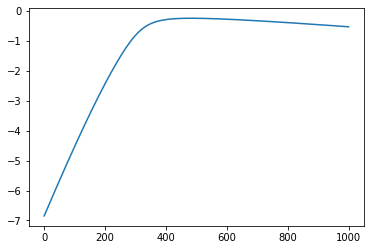

In [72]:
plt.plot(e_list)
plt.show()

In [146]:
def predict(X_test,opti_w_mtrx,opti_b):
    
    confidence = hypothesis(X_Test,opti_w_mtrx,opti_b)
    for i in range(X_Test.shape[1]):
        if(confidence[i][0]<0.5):
            confidence[i][0]= 0
        else:
            confidence[i][0]= 1
    return confidence

In [159]:
Xtest = pd.read_csv("./Downloads/Logistic_X_Test.csv")
X_Test = Xtest.values.T
preds = predict(X_test,opti_w_mtrx,opti_b)
pred_df = pd.DataFrame(preds)
prediction_matrix = Xtest.join(pred_df)
prediction_matrix.rename(columns = {0 : "predicted class"})


,f1,f2,f3,predicted class
0,-0.767508,-0.261859,-2.514831,1.0
1,-1.241653,1.449001,-0.413089,1.0
2,1.925270,1.931761,1.342619,0.0
3,-1.298255,1.049761,-0.527319,1.0
4,-0.964712,0.938088,-1.186328,1.0
...,...,...,...,...
995,2.877461,3.043965,2.308939,0.0
996,3.128835,3.115084,1.856309,0.0
997,-1.186969,0.947347,-0.786386,1.0
998,-0.532324,1.845170,-0.993550,1.0
